In [2]:
# Loading libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import dataframe
df = pd.read_csv('Smoking Data.csv')

In [4]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


### Encoding

In [5]:
df['smoker'] = df['smoker'].replace(['yes', 'no'],[1,0])

In [6]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,1
1,southeast,18,male,33.770,1,0
2,southeast,28,male,33.000,3,0
3,northwest,33,male,22.705,0,0
4,northwest,32,male,28.880,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
from pandas.core.dtypes.common import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [10]:
x = df.drop('smoker', axis=1)
y = df.smoker

In [43]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


In [44]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [45]:
y.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

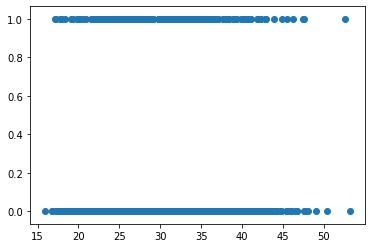

In [46]:
plt.scatter(x.bmi,y)

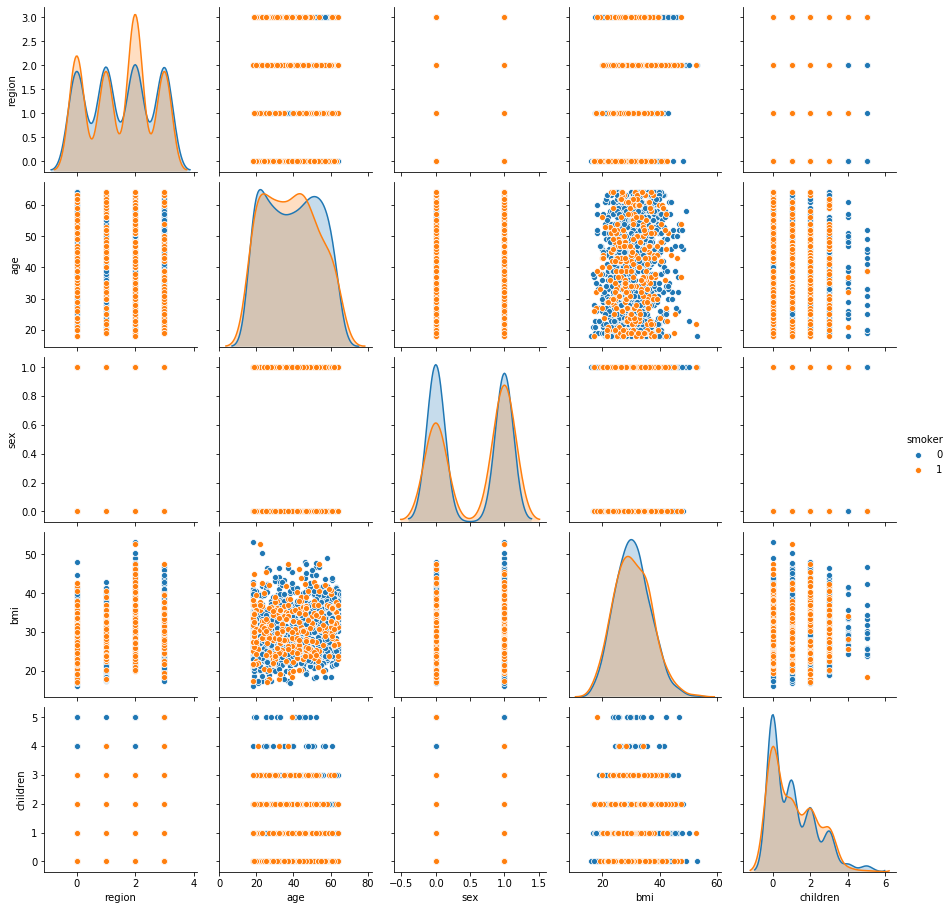

In [48]:
sns.pairplot(df, hue='smoker', height=2.5)

## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [21]:
lr.coef_

array([[-0.00703725, -0.00429942,  0.36977731,  0.00138905,  0.01527331]])

In [22]:
lr.intercept_

array([-1.43500106])

In [25]:
# Predicted probability of x
lr.predict_proba(x)

array([[0.81743236, 0.18256764],
       [0.74922937, 0.25077063],
       [0.75176047, 0.24823953],
       ...,
       [0.81385841, 0.18614159],
       [0.81914467, 0.18085533],
       [0.840764  , 0.159236  ]])

In [28]:
# predicted y
lr.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
np.array(y)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

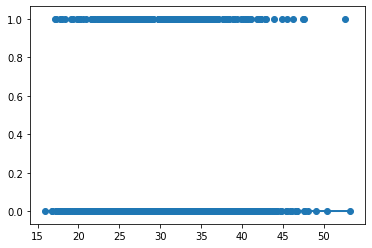

In [38]:
plt.scatter(x.bmi,y)
plt.plot(x.bmi,lr.predict(x))

In [29]:
# Training Score
lr.score(x,y)

0.7952167414050823